<h1>1.Analisis Exploratorio

In [38]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [13]:
Datos=pd.read_csv('winequality-red.csv')

In [14]:
Datos.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
# Visualización inicial de los datos
print(Datos.head())
print(Datos.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

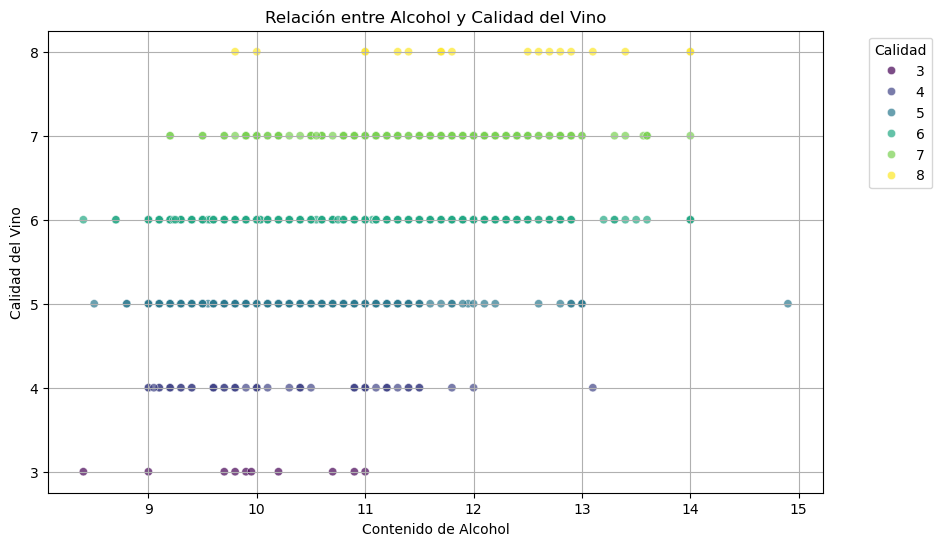

In [8]:
# Visualización de la relación entre 'alcohol' y 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Datos, x='alcohol', y='quality', hue='quality', palette='viridis', alpha=0.7)
plt.title('Relación entre Alcohol y Calidad del Vino')
plt.xlabel('Contenido de Alcohol')
plt.ylabel('Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


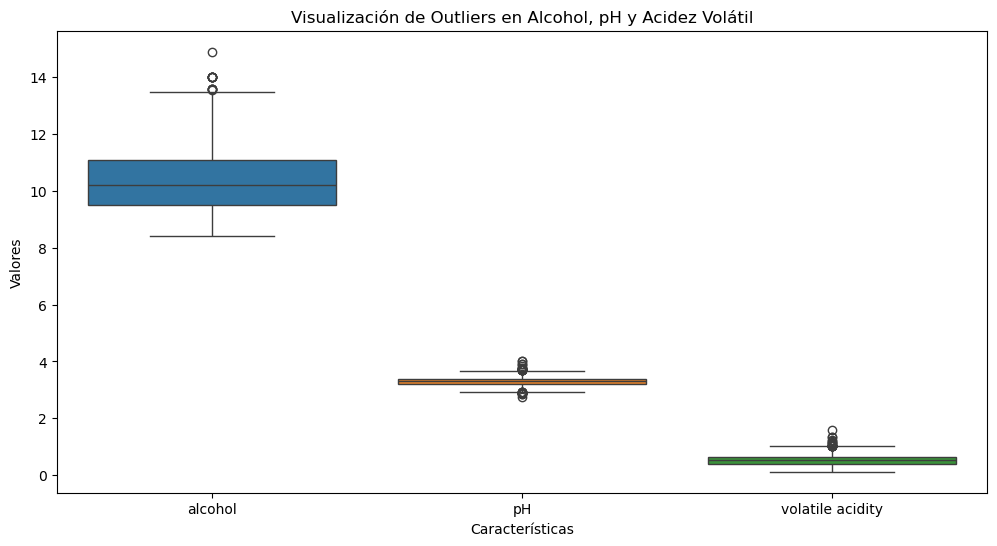

In [9]:
# Selección de características importantes
caracteristicas_importantes = ['alcohol', 'pH', 'volatile acidity']

# Visualización de outliers en las características seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=Datos[caracteristicas_importantes])
plt.title('Visualización de Outliers en Alcohol, pH y Acidez Volátil')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.xticks(ticks=range(len(caracteristicas_importantes)), labels=caracteristicas_importantes)
plt.show()

<h1>2.prepocesamiento de los datos 

In [10]:
# Comprobación de valores faltantes
print(Datos.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<h1>3.caracteristicas mas relevantes

In [11]:
# Selección de características y variable objetivo
features = Datos.columns[:-1]  # Todas las columnas menos 'quality'
X = Datos[features]
y = Datos['quality']  # Variable objetivo: calidad del vino

<h1>4.Dividir el Dataset



In [15]:
# Selección de características (X) y variable objetivo (y)
features = Datos.columns[:-1]  # Todas las columnas menos 'quality'
X = Datos[features]  # Variables predictoras
y = Datos['quality']  # Variable objetivo: calidad del vino

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)



In [16]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
717             7.6             0.460         0.11             2.6      0.079   
1214           10.2             0.330         0.46             1.9      0.081   
1192            7.2             0.250         0.37             2.5      0.063   
775             7.2             1.000         0.00             3.0      0.102   
1042            8.9             0.500         0.21             2.2      0.088   
...             ...               ...          ...             ...        ...   
763             9.3             0.655         0.26             2.0      0.096   
835             7.6             0.665         0.10             1.5      0.066   
1216            7.9             0.570         0.31             2.0      0.079   
559            13.0             0.470         0.49             4.3      0.085   
684             9.8             0.980         0.32             2.3      0.078   

      free sulfur dioxide  

In [17]:
print(y_test)

1109    6
1032    5
1002    7
487     6
979     5
       ..
692     5
808     5
506     7
333     5
1213    6
Name: quality, Length: 352, dtype: int64


<h1>5.entrenamiento del modelo

In [21]:
# Entrenamiento del modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

<h1>6.Evaluacion del modelo

In [29]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir resultados
print(f"Precisión: {accuracy:.2f}")
print("\nReporte de clasificación:\n", classification_rep)
print("Matriz de confusión:\n", conf_matrix)



Precisión: 0.61

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.38      0.25      0.30        12
           5       0.72      0.63      0.67       153
           6       0.61      0.65      0.63       149
           7       0.37      0.55      0.44        31
           8       0.00      0.00      0.00         5

    accuracy                           0.61       352
   macro avg       0.35      0.35      0.34       352
weighted avg       0.62      0.61      0.61       352

Matriz de confusión:
 [[ 0  0  1  1  0  0]
 [ 0  3  4  2  3  0]
 [ 0  3 97 50  2  1]
 [ 0  1 30 97 20  1]
 [ 0  1  3  8 17  2]
 [ 0  0  0  1  4  0]]


<h1>7.Graficas

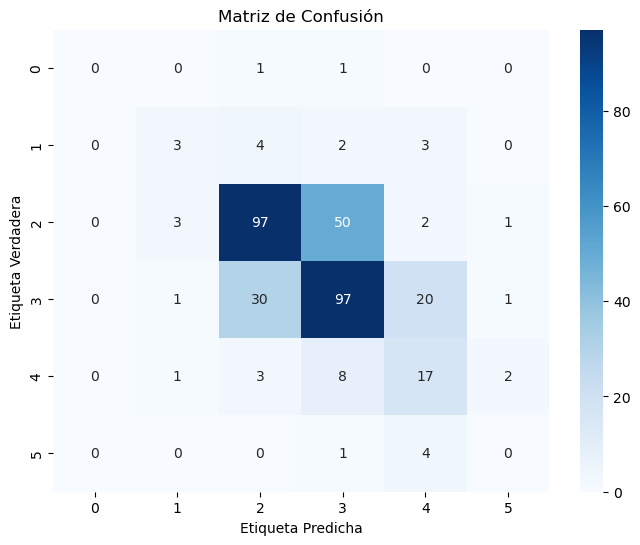

In [30]:
# Gráfico de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

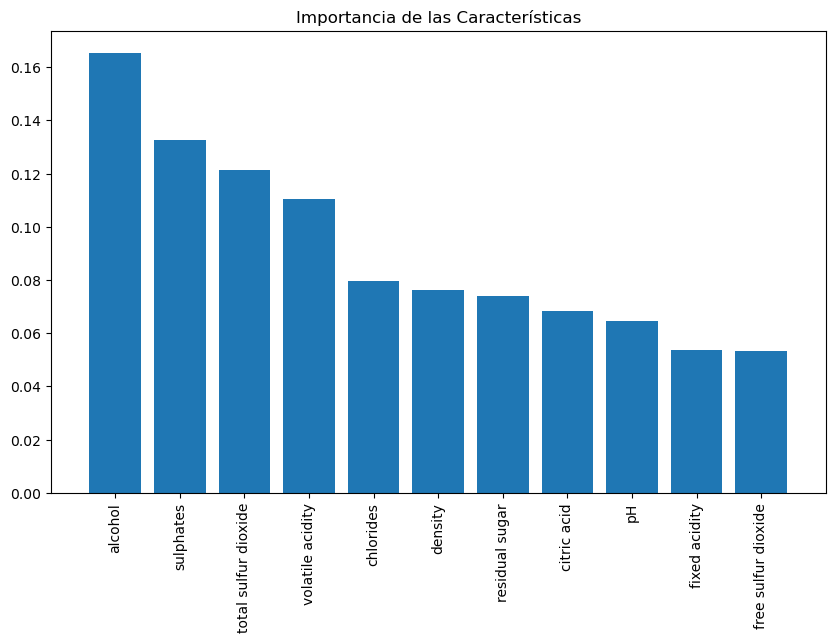

In [31]:
# Visualización de la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

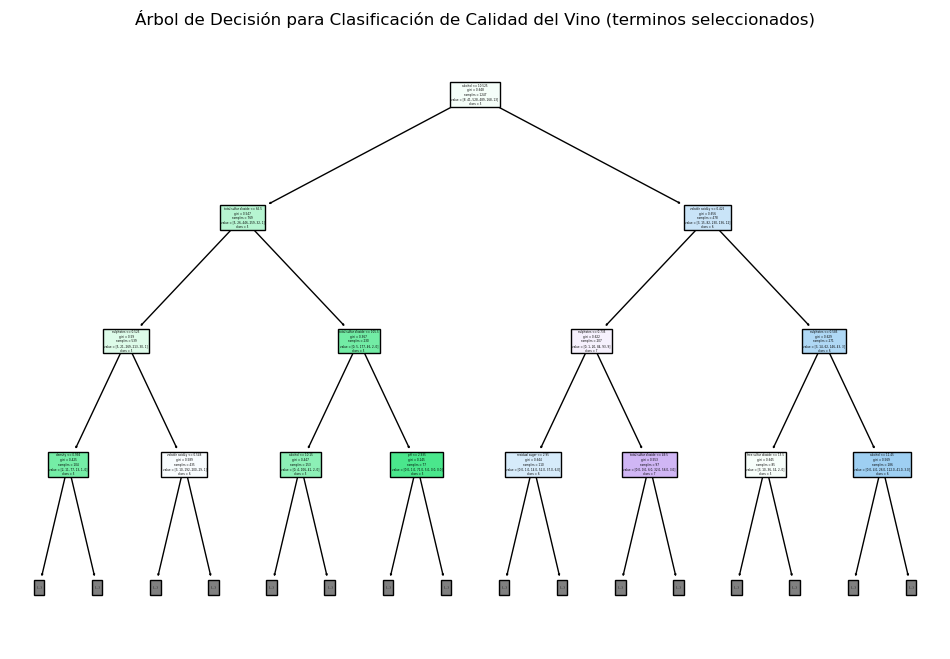

In [42]:
plt.figure(figsize=(12, 8))  # Cambiar el tamaño de la figura
plot_tree(model, 
          feature_names=features, 
          class_names=[str(i) for i in range(3, 10)], 
          filled=True, 
          max_depth=3)  # Limitar la profundidad del árbol
plt.title('Árbol de Decisión para Clasificación de Calidad del Vino (terminos seleccionados)')
plt.show()
